**1. BinaryClassification**

In [ ]:
from tensorflow.python.util.tf_export import KERAS_API_NAME
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import math

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

print(red.head())
print('-'*100)
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
----------------------------------------------------------------------------------------------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1

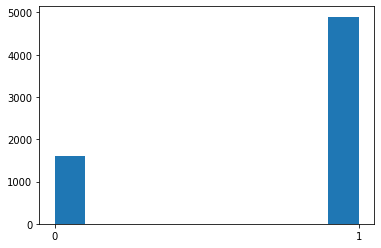

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(

In [ ]:
red['type']=0
white['type']=1
print(red.head(2))
print('-'*100)
print(white.head(2))

wine = pd.concat([red, white])

print('-'*100)
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print('-'*100)
print(wine.info())

In [ ]:
wine_norm=(wine-wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print('-'*100)
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [ ]:
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
print('-'*100)
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
906        0.371901          0.126667     0.271084        0.010736   0.064784   
4523       0.239669          0.066667     0.150602        0.210123   0.064784   
2515       0.272727          0.026667     0.180723        0.038344   0.014950   
79         0.239669          0.306667     0.168675        0.073620   0.084718   
2953       0.181818          0.133333     0.150602        0.018405   0.054817   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
906              0.024306              0.152074  0.140544  0.279070   
4523             0.270833              0.329493  0.200308  0.310078   
2515             0.048611              0.071429  0.056487  0.232558   
79               0.069444              0.228111  0.150183  0.426357   
2953             0.024306              0.235023  0.111625  0.279070   

      sulphates   alcohol   quality  type  
906    0.219101  0.333333  0.166667   1.0 

In [ ]:
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.37190083 0.12666667 0.27108434 0.0107362  0.06478405 0.02430556
 0.15207373 0.14054367 0.27906977 0.21910112 0.33333333 0.16666667]
1.0
[0.15702479 0.25333333 0.27710843 0.01226994 0.05149502 0.10416667
 0.37557604 0.11740891 0.31782946 0.14044944 0.11594203 0.33333333]
1.0
[0. 1.]
[0. 1.]


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu',input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),
  tf.keras.layers.Dense(units=12, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 2s 10ms/step - loss: 0.1925 - accuracy: 0.9312 - val_loss: 0.0597 - val_accuracy: 0.9831
Epoch 2/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0730 - accuracy: 0.9831 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 3/25
122/122 [==============================] - 1s 7ms/step - loss: 0.0754 - accuracy: 0.9792 - val_loss: 0.1019 - val_accuracy: 0.9515
Epoch 4/25
122/122 [==============================] - 1s 7ms/step - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.0736 - val_accuracy: 0.9838
Epoch 5/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.9800 - val_loss: 0.0970 - val_accuracy: 0.9731
Epoch 6/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0708 - accuracy: 0.9808 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 7/25
122/122 [==============================] - 1s 6ms/step - loss: 0.0489 - accuracy: 0.9874 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch

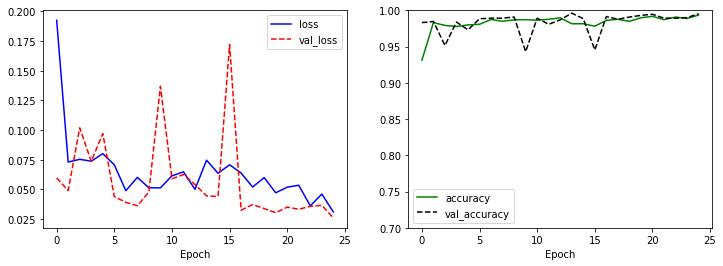

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9962


[0.024559659883379936, 0.9961538314819336]

**2.Decision_Tree**

붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화 해 보기. DecisionTreeClassifier/DecisionTreeRegressor 중에서 DecisionTreeClassifier를 사용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
#dt_clf = DecisionTreeClassifier(criterion='gini',random_state=156)
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, train_size=0.8,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=156)

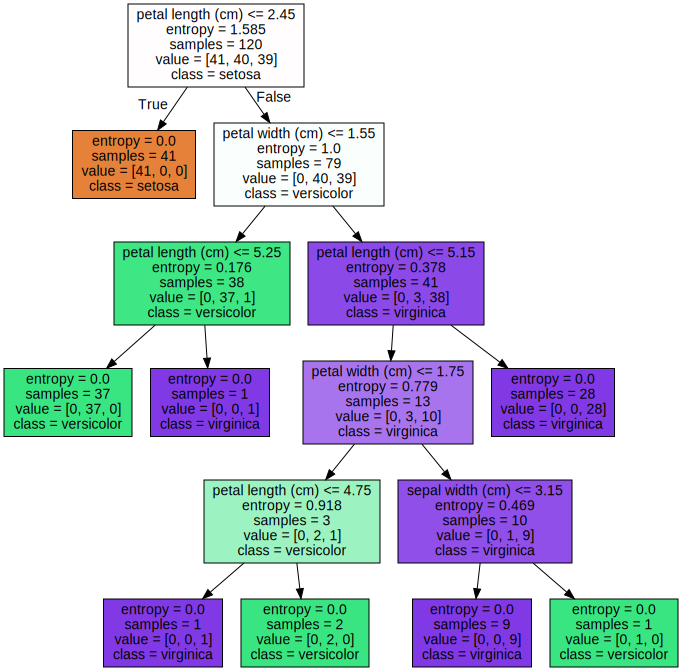

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

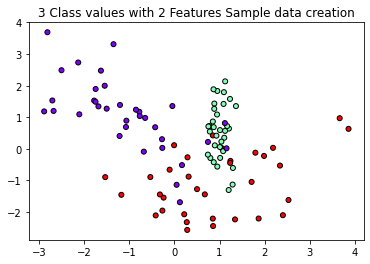

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

**3. KNN**

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris= datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df.columns =['sepal_length','sepal_width','petal_length','petal_width']
df['target'] = iris['target']

In [ ]:
df= df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


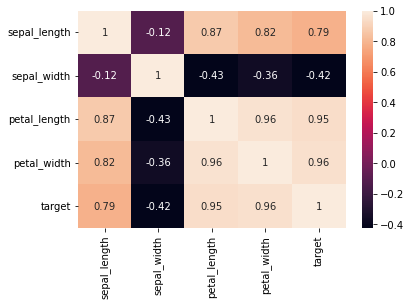

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.corr(), annot=True)
plt.show()

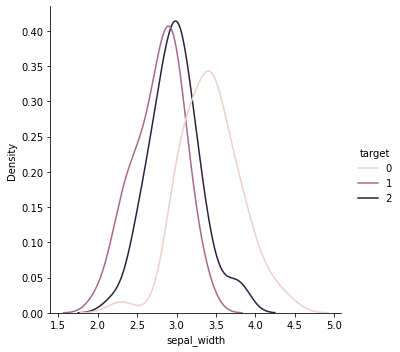

In [ ]:
sns.displot(x='sepal_width',kind='kde',hue='target',data=df)
plt.show()

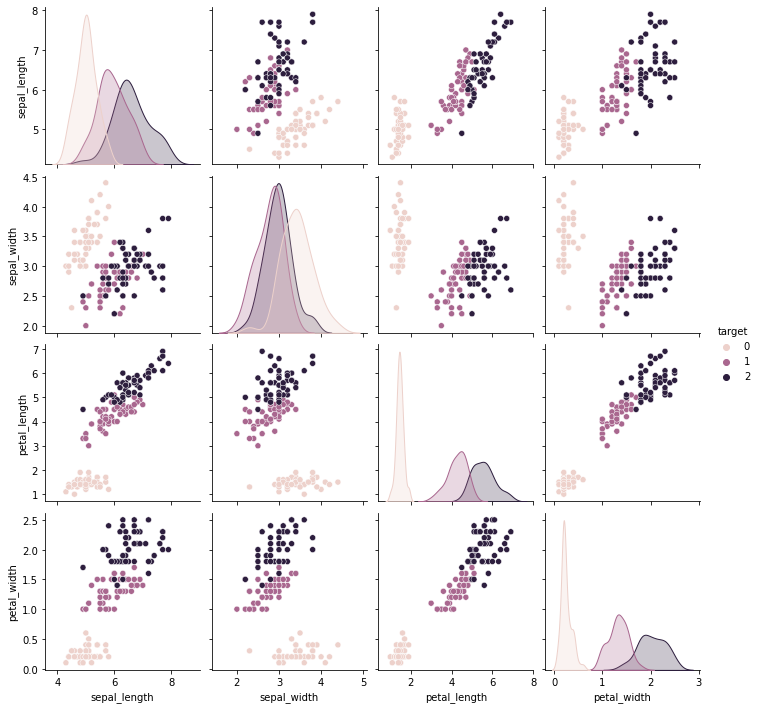

In [ ]:
sns.pairplot(df, hue='target',diag_kind='kde')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


X_data=df.loc[:,'sepal_length':'petal_width']
y_data =df.loc[:,'target']

x_train, x_test,y_train,y_test= train_test_split(X_data,y_data,test_size=0.3,shuffle=True,random_state=20)

In [ ]:
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(x_train,y_train)

knn_pred=knnModel.predict(x_test)

print('accuracy : %.3f'%(accuracy_score(y_test, knn_pred)))

accuracy : 0.956


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=0)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('accuracy : %.3f'%(accuracy_score(y_test, dtc_pred)))

accuracy : 0.933


**4.SVM 예제1**

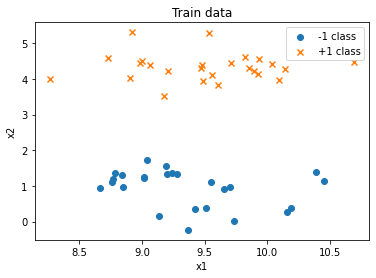

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
X, y = make_blobs(n_samples=50,  centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train data")
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.1).fit(X, y)

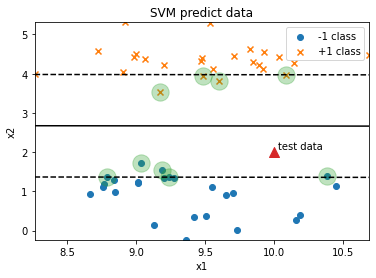

In [ ]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM predict data")

plt.show()

**5.SVM 예제2**

랜덤하게 2만명의 키와 몸무게 데이터를 만들고, 비만도를 계산하여 저체중, 정상, 비만 레이블을 붙이는 SVM을 만들어 학습시키고자 합니다. 비만을 정확하게 맞출 수 있는지 테스트 해 보기.

ok, {'thin': 6311, 'normal': 5859, 'fat': 7830}


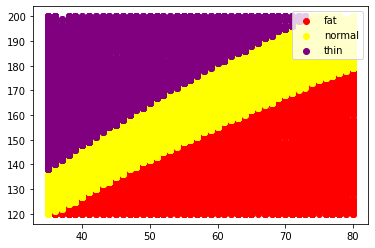

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2 #BMI 공식
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("bmi.csv","w")
fp.write("height,weight,label\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\n".format(h, w, label))
fp.close()
print("ok,", cnt)

tbl = pd.read_csv("bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 
plt.savefig("bmi-test.png")
plt.show()

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기
tbl = pd.read_csv("bmi.csv")

# 칼럼(열)을 자르고 정규화하기
label = tbl["label"]
w = tbl["weight"]  /80 # 최대 80kg라고 가정
h = tbl["height"]  /200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(wh, label)

# 데이터 학습하기
clf = svm.LinearSVC()
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9266
리포트 =
               precision    recall  f1-score   support

         fat       0.90      1.00      0.95      1990
      normal       1.00      0.75      0.86      1471
        thin       0.91      1.00      0.95      1539

    accuracy                           0.93      5000
   macro avg       0.94      0.92      0.92      5000
weighted avg       0.93      0.93      0.92      5000

